In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-16 15:24:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.6MB/s    in 35s     

2020-05-16 15:25:06 (8.70 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# base_dir = '/tmp/rockpaperscissors/'
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'val')

In [0]:
mypath= '/tmp/rockpaperscissors/'

In [0]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [0]:
import pandas as pd

In [13]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
              1
paper       712
rock        726
scissors    750
dtype: int64

In [0]:
# menghapus folder dataset jika diperlukan
!rm -rf /tmp/rockpaperscissors/rps-cv-images

In [14]:
#cek sample datanya
df.head()

,path,file_name,tag
0,/tmp/rockpaperscissors/README_rpc-cv-images.txt,README_rpc-cv-images.txt,
1,/tmp/rockpaperscissors/paper/bTurr7qf07hoPQu1.png,bTurr7qf07hoPQu1.png,paper
2,/tmp/rockpaperscissors/paper/MmzlgKI366LYX3fe.png,MmzlgKI366LYX3fe.png,paper
3,/tmp/rockpaperscissors/paper/E10FR2TKbBsv9Hgm.png,E10FR2TKbBsv9Hgm.png,paper
4,/tmp/rockpaperscissors/paper/zVMOQFwVINs3dj8o.png,zVMOQFwVINs3dj8o.png,paper


In [0]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

In [0]:
X= df['path']
y= df['tag']

In [0]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [0]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [0]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [20]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 1751
val size 219
test size 219


In [21]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag     
test        paper        74
            rock         72
            scissors     73
train       paper       570
            rock        578
            scissors    603
validation                1
            paper        68
            rock         76
            scissors     74
dtype: int64 




,path,tag,set
2000,/tmp/rockpaperscissors/paper/LYirpnRmbCGN6T7O.png,paper,validation
411,/tmp/rockpaperscissors/paper/Ih5Z5Z3xFZ17IcZS.png,paper,train
1592,/tmp/rockpaperscissors/paper/Je4YZuaXlY4KaAfQ.png,paper,train


In [0]:
import shutil
from tqdm.notebook import tqdm as tq

In [0]:
datasource_path = "/tmp/rockpaperscissors"
dataset_path = "dataset/"

In [24]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest')

In [81]:
train_generator = train_datagen.flow_from_directory(
        'dataset/train/',  # direktori data latih
        target_size=(150, 100),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=20,
        class_mode='categorical') # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        
 
validation_generator = val_datagen.flow_from_directory(
        'dataset/validation/', # direktori data validasi
        target_size=(150, 100), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=20,
        class_mode='categorical') # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'


validation_generator = test_datagen.flow_from_directory(
        'dataset/test/', # direktori data validasi
        target_size=(150, 100), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=20,
        class_mode='categorical') # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'

Found 1751 images belonging to 3 classes.
Found 218 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')    
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [84]:
# callbacks = [EarlyStopping(monitor='val_accuracy',patience=3)]
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 16s - loss: 1.1551 - accuracy: 0.3700 - val_loss: 1.0789 - val_accuracy: 0.3400
Epoch 2/20
25/25 - 16s - loss: 1.0518 - accuracy: 0.4780 - val_loss: 0.7786 - val_accuracy: 0.6667
Epoch 3/20
25/25 - 16s - loss: 0.8603 - accuracy: 0.6620 - val_loss: 0.7126 - val_accuracy: 0.7200
Epoch 4/20
25/25 - 16s - loss: 0.4958 - accuracy: 0.8187 - val_loss: 0.4467 - val_accuracy: 0.7475
Epoch 5/20
25/25 - 16s - loss: 0.4398 - accuracy: 0.8420 - val_loss: 0.3735 - val_accuracy: 0.9100
Epoch 6/20
25/25 - 16s - loss: 0.3852 - accuracy: 0.8600 - val_loss: 0.4465 - val_accuracy: 0.8182
Epoch 7/20
25/25 - 16s - loss: 0.3878 - accuracy: 0.8760 - val_loss: 0.2214 - val_accuracy: 0.9300
Epoch 8/20
25/25 - 16s - loss: 0.3369 - accuracy: 0.8839 - val_loss: 0.2709 - val_accuracy: 0.9394
Epoch 9/20
25/25 - 16s - loss: 0.2476 - accuracy: 0.9040 - val_loss: 0.1382 - val_accuracy: 0.9600
Epoch 10/20
25/25 - 16s - loss: 0.2236 - accuracy: 0.9240 - val_loss: 0.3154 - val_accuracy: 0.9293
Epoch 11/

Saving heh.jpg to heh (9).jpg
[[0. 1. 0.]]
rock


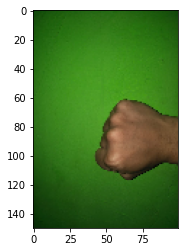

In [92]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)
  
  print(classes)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')